In [1]:
# Download data from yfinance

# required libraries
import yfinance as yf
import pandas as pd

# Tickers
stocks = ["MSFT", "NVDA", "GOOGL", "AMZN", "META"]
market = "^GSPC"   # S&P 500

# Get monthly Open, High, Low, Close, Adj Close, Volume for stocks
stocks_monthly = yf.download(
    tickers=stocks,
    start="2020-01-01",    # start Jan 2020
    end="2025-10-31",     # end October 2025
    interval="1mo",     # monthly intervals
    group_by="ticker",  # keeps each ticker separate
    auto_adjust=False   # keep raw OHLCV (not adjusted)
)

# Get monthly Open, High, Low, Close, Adj Close, Volume for market index
market_monthly = yf.download(
    tickers=market,
    start="2020-01-01",  # start Jan 2020
    end="2025-10-31",    # end October 2025
    interval="1mo",      # monthly intervals
    group_by="ticker",
    auto_adjust=False
)


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Company Data

# Flatten MultiIndex columns in stocks_monthly
stocks_monthly.columns = [
    f"{col[0]}_{col[1]}" for col in stocks_monthly.columns.to_flat_index()
]

stocks_monthly.head()

,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,...,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,67.420502,75.028999,67.324501,71.639000,71.148285,673594000,5.96875,6.48750,5.78175,5.91075,...,90.766998,100.435997,100.435997,1693966000,158.779999,174.050003,156.509995,170.229996,161.630203,558530000
2020-02-01,73.082497,76.537003,63.410500,66.962502,66.503822,830656000,5.89250,7.90800,5.88625,6.75175,...,90.556503,94.187500,94.187500,1850202000,170.429993,190.699997,152.000000,162.009995,153.825485,887522300
2020-03-01,67.569504,70.409500,50.443501,58.097500,57.699539,1570716000,6.92250,7.12225,4.51700,6.59000,...,81.301498,97.486000,97.486000,3276182000,165.309998,175.000000,132.520004,157.710007,150.151718,1612695500
2020-04-01,56.200001,68.007500,53.754002,67.334999,66.873756,1124224000,6.39125,7.60500,5.95975,7.30700,...,94.457497,123.699997,123.699997,2492196000,153.000000,180.399994,150.360001,179.210007,170.621307,984705000
2020-05-01,66.204498,72.255501,64.800499,71.676003,71.185028,725130000,7.10875,9.18175,7.02100,8.87550,...,112.819000,122.118500,122.118500,1651688000,175.800003,187.509995,173.800003,183.250000,174.467728,688845000


In [3]:
# S&P 500 data
# Flatten MultiIndex columns in stocks_monthly
market_monthly.columns = [
    f"{col[0]}_{col[1]}" for col in market_monthly.columns.to_flat_index() ]

market_monthly.head()

,^GSPC_Open,^GSPC_High,^GSPC_Low,^GSPC_Close,^GSPC_Adj Close,^GSPC_Volume
Date,,,,,,
2020-01-01,3244.669922,3337.770020,3214.639893,3225.520020,3225.520020,77287980000
2020-02-01,3235.659912,3393.520020,2855.840088,2954.219971,2954.219971,84436590000
2020-03-01,2974.280029,3136.719971,2191.860107,2584.590088,2584.590088,162185380000
2020-04-01,2498.080078,2954.860107,2447.489990,2912.429932,2912.429932,123608160000
2020-05-01,2869.090088,3068.669922,2766.639893,3044.310059,3044.310059,107135190000


In [4]:
# loadsaved google trends dataset
trends_monthly = pd.read_csv(r"C:\Users\joaqu\Downloads\trends_monthly.csv")
trends_monthly = trends_monthly.set_index('date')
trends_monthly.index = pd.to_datetime(trends_monthly.index)

trends_monthly.head()

,AI,Gemini,ChatGPT,Machine Learning,OpenAI,Meta AI,Microsoft AI,NVIDIA AI,Google AI,Amazon AI
date,,,,,,,,,,
2020-01-01,5,2,0,1,0,0,0,0,1,0
2020-02-01,5,2,0,1,0,0,0,0,1,0
2020-03-01,5,1,0,0,0,0,0,0,1,0
2020-04-01,6,2,0,0,0,0,0,0,1,0
2020-05-01,5,2,0,1,0,0,0,0,1,0


In [5]:
# Compute Engineered features

# 1) Monthly returns for each stock
stocks_monthly_returns = stocks_monthly[['AMZN_Adj Close','META_Adj Close','GOOGL_Adj Close','NVDA_Adj Close','MSFT_Adj Close']].pct_change().dropna()
stocks_monthly_returns.columns = ['AMZN_ret','META_ret','GOOGL_ret','NVDA_ret','MSFT_ret']

# 2) Market index monthly returns
market_monthly_returns = market_monthly[['^GSPC_Adj Close']].pct_change().dropna()
market_monthly_returns.columns = ['Market_ret']

# 3) Monthly excess returns of each stock
excess_returns = stocks_monthly_returns.sub(market_monthly_returns['Market_ret'], axis=0)
excess_returns.columns = ['AMZN_excess','META_excess','GOOGL_excess','NVDA_excess','MSFT_excess']


# 4) Lagged Trends Features (t−1, t−2), for time-series analysis
trends_lagged = trends_monthly.copy()
lag_periods = [1, 2]

for col in trends_lagged.columns:
    for lag in lag_periods:
        trends_lagged[f'{col}_lag{lag}'] = trends_lagged[col].shift(lag)
        
# drop rows with NaN
trends_lagged = trends_lagged.dropna()


In [6]:
# Merge to final Data Frame
final_df = pd.concat([stocks_monthly_returns, excess_returns, trends_lagged], axis=1).dropna()
final_df

,AMZN_ret,META_ret,GOOGL_ret,NVDA_ret,MSFT_ret,AMZN_excess,META_excess,GOOGL_excess,NVDA_excess,MSFT_excess,...,Meta AI_lag1,Meta AI_lag2,Microsoft AI_lag1,Microsoft AI_lag2,NVIDIA AI_lag1,NVIDIA AI_lag2,Google AI_lag1,Google AI_lag2,Amazon AI_lag1,Amazon AI_lag2
2020-03-01,0.035021,-0.133371,-0.132388,-0.023373,-0.023883,0.160140,-0.008252,-0.007268,0.101746,0.101237,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-04-01,0.268900,0.227278,0.159000,0.108801,0.136326,0.142056,0.100434,0.032156,-0.018043,0.009482,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-05-01,-0.012785,0.099555,0.064469,0.214657,0.022544,-0.058067,0.054274,0.019187,0.169375,-0.022738,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-06-01,0.129567,0.008797,-0.010792,0.070109,0.113652,0.111178,-0.009592,-0.029180,0.051721,0.095264,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-07-01,0.147114,0.117144,0.049293,0.118117,0.007371,0.092012,0.062043,-0.005808,0.063015,-0.047731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01,0.070143,0.139925,0.026144,0.169170,0.082464,0.020536,0.090318,-0.023463,0.119564,0.032857,...,7.0,9.0,3.0,3.0,1.0,1.0,23.0,18.0,1.0,1.0
2025-07-01,0.067095,0.048700,0.090236,0.125909,0.072556,0.045429,0.027034,0.068570,0.104242,0.050889,...,6.0,7.0,3.0,3.0,1.0,1.0,31.0,23.0,2.0,1.0
2025-08-01,-0.021827,-0.044916,0.109484,-0.020746,-0.050253,-0.040894,-0.063983,0.090418,-0.039812,-0.069320,...,6.0,6.0,4.0,3.0,2.0,1.0,30.0,31.0,3.0,2.0
2025-09-01,-0.041179,-0.005848,0.141797,0.071191,0.023903,-0.076503,-0.041172,0.106473,0.035867,-0.011421,...,11.0,6.0,10.0,4.0,9.0,2.0,45.0,30.0,13.0,3.0


In [7]:
# Save data frames
stocks_monthly.to_csv('stocks_monthly.csv')
market_monthly.to_csv('market_monthly.csv')
trends_monthly.to_csv('trends_monthly.csv')

# computed dataframe 
final_df.to_csv('final_features.csv')

-------------------------------------------------------
Start of STATISTICAL ANALYSIS OF AI STOCK MARKET DATA
-------------------------------------------------------

In [8]:
final_df.shape

(68, 40)

In [9]:
final_df.info()
print("\n######################################\n")
final_df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2020-03-01 to 2025-10-01
Freq: MS
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMZN_ret               68 non-null     float64
 1   META_ret               68 non-null     float64
 2   GOOGL_ret              68 non-null     float64
 3   NVDA_ret               68 non-null     float64
 4   MSFT_ret               68 non-null     float64
 5   AMZN_excess            68 non-null     float64
 6   META_excess            68 non-null     float64
 7   GOOGL_excess           68 non-null     float64
 8   NVDA_excess            68 non-null     float64
 9   MSFT_excess            68 non-null     float64
 10  AI                     68 non-null     float64
 11  Gemini                 68 non-null     float64
 12  ChatGPT                68 non-null     float64
 13  Machine Learning       68 non-null     float64
 14  OpenAI                 68 non-n

,AMZN_ret,META_ret,GOOGL_ret,NVDA_ret,MSFT_ret,AMZN_excess,META_excess,GOOGL_excess,NVDA_excess,MSFT_excess,...,Meta AI_lag1,Meta AI_lag2,Microsoft AI_lag1,Microsoft AI_lag2,NVIDIA AI_lag1,NVIDIA AI_lag2,Google AI_lag1,Google AI_lag2,Amazon AI_lag1,Amazon AI_lag2
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.018309,0.025291,0.024750,0.060927,0.020003,0.004676,0.011658,0.011117,0.047295,0.006370,...,1.500000,1.323529,1.205882,1.014706,0.544118,0.426471,7.897059,6.441176,0.838235,0.647059
std,0.093418,0.118785,0.081831,0.141280,0.064910,0.072223,0.101138,0.062863,0.116009,0.045495,...,2.788569,2.476403,2.134009,1.569225,1.490606,1.175828,14.029968,8.293825,2.216696,1.636931
min,-0.237525,-0.326342,-0.179467,-0.320158,-0.107376,-0.173315,-0.393248,-0.151134,-0.232202,-0.083169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,-0.042222,-0.045340,-0.029099,-0.026068,-0.026869,-0.044371,-0.043722,-0.027547,-0.038703,-0.024680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.023462,0.019225,0.031390,0.064026,0.019095,-0.004312,0.014500,0.009760,0.043380,-0.004177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.500000,0.000000,0.000000
75%,0.072884,0.100049,0.086693,0.147166,0.065891,0.051680,0.075760,0.046759,0.108255,0.031771,...,3.000000,1.500000,2.000000,2.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000
max,0.270596,0.267711,0.159000,0.363436,0.176291,0.179480,0.213959,0.145440,0.360954,0.123725,...,12.000000,11.000000,13.000000,10.000000,9.000000,9.000000,100.000000,45.000000,13.000000,13.000000


In [10]:
# compute average returns of each AI company
returns = ["AMZN_ret", "META_ret", "GOOGL_ret", "NVDA_ret", "MSFT_ret"]

final_df[returns].mean()


AMZN_ret     0.018309
META_ret     0.025291
GOOGL_ret    0.024750
NVDA_ret     0.060927
MSFT_ret     0.020003
dtype: float64

In [11]:
# compute average excess returns
ai_excess_cols = ["AMZN_excess", "META_excess", "GOOGL_excess", 
                "NVDA_excess", "MSFT_excess"]

final_df[ai_excess_cols].mean()

AMZN_excess     0.004676
META_excess     0.011658
GOOGL_excess    0.011117
NVDA_excess     0.047295
MSFT_excess     0.006370
dtype: float64

**All AI stocks beat the market on average since average excess returns are all positive.**

excess = stock - market

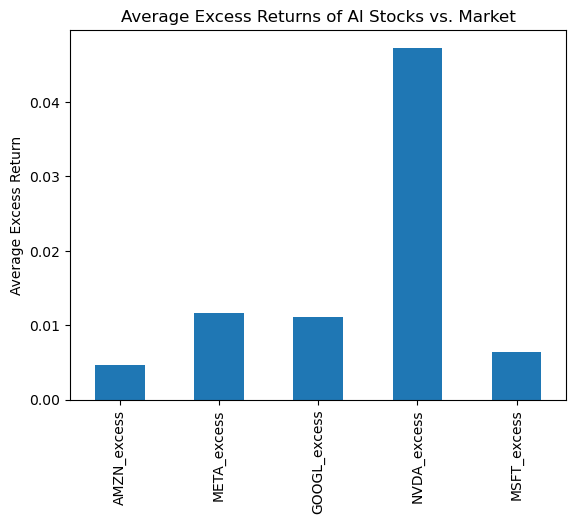

In [12]:
import matplotlib.pyplot as plt

final_df[ai_excess_cols].mean().plot(kind='bar')
plt.title("Average Excess Returns of AI Stocks vs. Market")
plt.ylabel("Average Excess Return")
plt.show()

interactive version in altair

In [13]:
import altair as alt

mean_series = final_df[ai_excess_cols].mean()
mean_df = mean_series.reset_index()
mean_df.columns = ['Stock', 'AvgExcessReturn']

highlight = alt.selection_single(
    fields=['Stock'], 
    nearest=True, 
    on='mouseover', 
    empty='none'
)

# interactive bar chart
bars = alt.Chart(mean_df).mark_bar().encode(
    x=alt.X('Stock:N', title=''),
    y=alt.Y('AvgExcessReturn:Q', title='Average Excess Return'),
    color=alt.condition(highlight, alt.value('orange'), alt.value('steelblue')),
    tooltip=[
        alt.Tooltip('Stock:N', title='Stock'),
        alt.Tooltip('AvgExcessReturn:Q', title='Avg Excess Return', format=".4f")
    ]
).add_selection(
    highlight
).properties(
    width=500,
    height=350,
    title='Average Excess Returns of AI Stocks vs. Market'
)

bars

C:\Users\joaqu\AppData\Local\Temp\ipykernel_21164\4131391289.py:7: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  highlight = alt.selection_single(
C:\Users\joaqu\AppData\Local\Temp\ipykernel_21164\4131391289.py:23: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

NVIDIA is the best performer in terms of beating the market

(Null hypothesis) Ho: excess = 0
(Alternative hypothesis) Ha: excess != 0 

In [13]:
from scipy.stats import ttest_1samp

# statistical test on AI stocks to prove valuation growth
for col in ["AMZN_excess", "META_excess", "GOOGL_excess", "NVDA_excess", "MSFT_excess"]:
    t, p = ttest_1samp(final_df[col].dropna(), 0)
    print(col, "t=", round(t, 3), "p=", round(p, 4))

AMZN_excess t= 0.534 p= 0.5952
META_excess t= 0.951 p= 0.3452
GOOGL_excess t= 1.458 p= 0.1494
NVDA_excess t= 3.362 p= 0.0013
MSFT_excess t= 1.155 p= 0.2523


p < 0.05 : NVIDIA’s valuation grew significantly faster than the market.
As for the rest, we cannot conclude that they outperformed the market.

WHY?
NVIDIA has had huge AI-driven valuation spikes in the last few years.
This produces consistently positive excess returns in the periods you sampled

OTHERS
They’ve performed well over many years, but relative to the market, their excess returns are smaller.

Important: try other more significant AI companies: AMD, Coreweave, Palantir, Oracle, etc

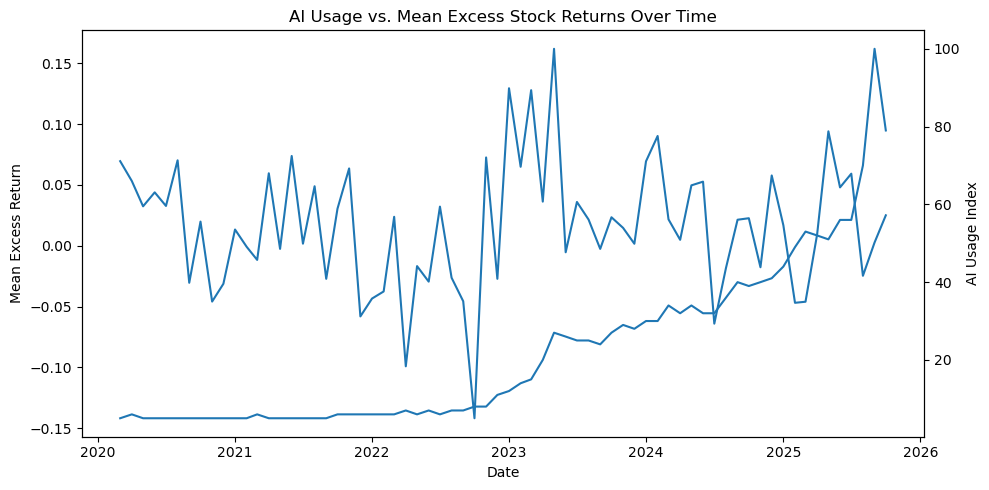

In [14]:
# Compute mean excess return across companies
excess_cols = ["AMZN_excess", "META_excess", "GOOGL_excess", "NVDA_excess", "MSFT_excess"]
final_df['mean_excess'] = final_df[excess_cols].mean(axis=1)

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot mean excess return
ax1.plot(final_df.index, final_df['mean_excess'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Mean Excess Return")

# Plot AI index on a second axis
ax2 = ax1.twinx()
ax2.plot(final_df.index, final_df['AI'])
ax2.set_ylabel("AI Usage Index")

plt.title("AI Usage vs. Mean Excess Stock Returns Over Time")
plt.tight_layout()
plt.show()